In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Year  25793 non-null  int64  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25793 non-null  int64  
 4   Vote_Average  25793 non-null  float64
 5   Genre         25793 non-null  object 
 6   Rating        25793 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB


Casting 'Genre' & 'Category' column into category

In [8]:
df['Genre'] = df['Genre'].astype('category')
df['Rating'] = df['Rating'].astype('category')

#confirming changes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Year  25793 non-null  int64   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
 6   Rating        25793 non-null  category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 1.0+ MB


In [25]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.nunique() #checking Unique values

Release_Year     102
Title           9513
Popularity      9160
Vote_Count      4482
Vote_Average      74
Genre             19
Rating             4
dtype: int64

Now as the Tranformation is completed, The next step is to derive Insights from this Data with help of Visualization

In [27]:
sns.set_style('whitegrid')

What is the Most frequent Genre of Movie?

In [28]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

Below Chart shows, the most frequest genre of the movies the are release accross the years.

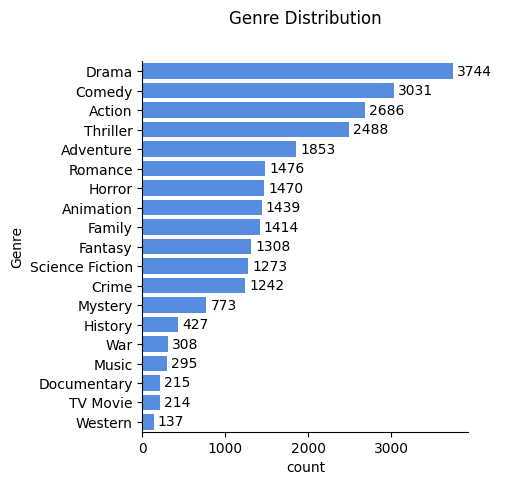

In [9]:
g = sns.catplot(y = 'Genre', data = df, kind = 'count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre column distribution')
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Genre Distribution', y = 1.08 )
plt.tight_layout()

plt.show()

 Below chart shows how many movies came over the years.  It puts the years in order and colors the bars blue. The year labels are tilted so they’re easier to read.

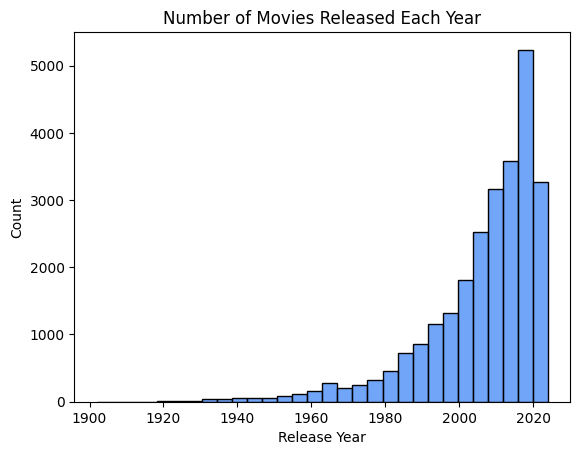

In [10]:
sns.histplot(x='Release_Year', data=df,color='#4287f5', bins = 30)

plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

This chart shows which movie genres are the most liked on average. It compares the popularity scores of each genre using bars. The longer the bar, the more popular that genre is overall

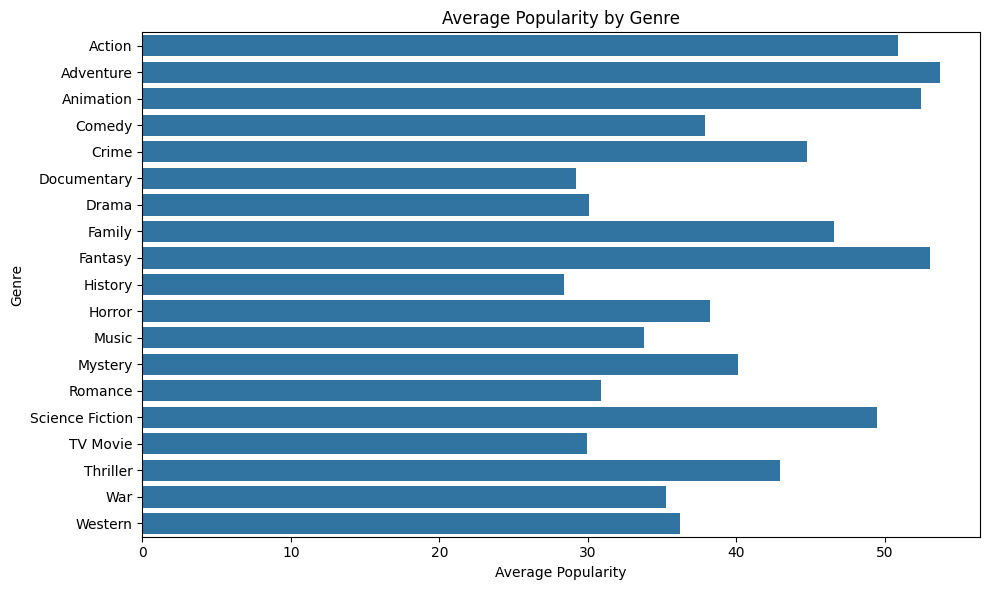

In [11]:
genre_popularity = df.groupby('Genre', observed=True)['Popularity'].mean().reset_index()


genre_popularity = genre_popularity.sort_values(by='Popularity', ascending=False)

plt.figure(figsize=(10, 6))


sns.barplot(data=genre_popularity, y='Genre', x='Popularity')

plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

High vote counts usually correspond to higher popularity but not always. The “popular” rating category aligns with higher vote counts and higher popularity, supporting the notion that wide reach usually boosts popularity. However, there are still many points with moderate popularity and vote counts within the “average” and even “below average” categories, showing that high votes do not guarantee high popularity or rating.

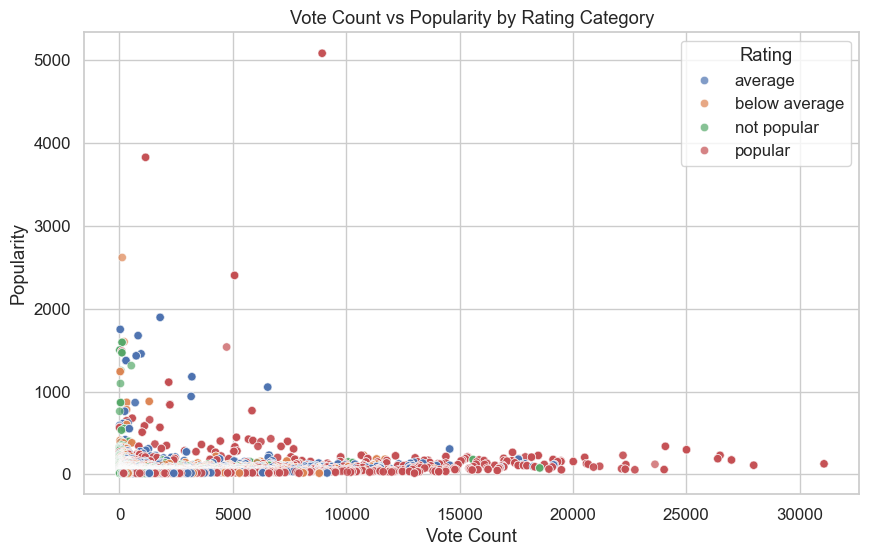

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vote_Count', y='Popularity', hue='Rating', alpha=0.7)
plt.title('Vote Count vs Popularity by Rating Category')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.legend(title='Rating')
plt.show()

Popularity and rating aren’t the same thing.

“Popular” movies can be big hits but many still aren’t.

You can have a bad movie that’s talked about a lot, or a great movie hardly anyone knows.

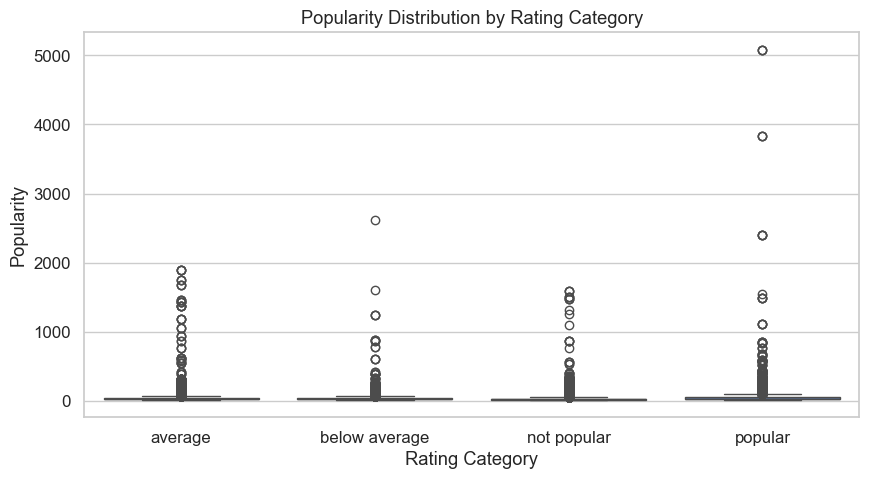

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Rating', y='Popularity')
plt.title('Popularity Distribution by Rating Category')
plt.ylabel('Popularity')
plt.xlabel('Rating Category')
plt.show()


Some movies were voted on a lot but still rated poorly.
This means many people watched them but didn’t enjoy them.
It highlights titles that got attention but failed to impress.

In [69]:
a = df[(df['Vote_Count'] > df['Vote_Count'].quantile(0.95)) & 
                  (df['Vote_Average'] < df['Vote_Average'].quantile(0.25))]

b = df[(df['Vote_Count'] < df['Vote_Count'].quantile(0.95)) & 
             (df['Vote_Average'] > df['Vote_Average'].quantile(0.95))]

# Group by Title
grouped_popularity = a.groupby('Title').agg({
    'Vote_Count': 'max',
    'Vote_Average': 'mean',
    'Genre': 'first'
}).reset_index()

grouped_votes = b.groupby('Title').agg({
    'Vote_Count': 'max',
    'Vote_Average': 'mean',
    'Genre': 'first'
}).reset_index()

pd.set_option('display.width', 1000)

print("Highly Voted but poorly rated:")
print(grouped_popularity.head())

print("\n \nLow Votes but highly rated:")
print(grouped_votes.head())

Highly Voted but poorly rated:
                                       Title  Vote_Count  Vote_Average      Genre
0                                       2012       10288           5.8     Action
1                           Assassin's Creed        6719           5.4     Action
2         Batman v Superman: Dawn of Justice       15596           5.9     Action
3                             Fantastic Four        7911           5.8     Action
4  Fantastic Four: Rise of the Silver Surfer        6657           5.6  Adventure

 
Low Votes but highly rated:
                              Title  Vote_Count  Vote_Average        Genre
0                      12 Angry Men        6227           8.5        Drama
1          1987: When the Day Comes          95           8.0        Drama
2                          3 Idiots        1789           8.0        Drama
3  50 Greatest Harry Potter Moments          49           8.0  Documentary
4                                8½        1733           8.2      Fant

Which genre has the lowest Vote and Count Avg?

In [43]:
lowest_rated_genre = df.groupby("Genre", observed=True)[["Vote_Average", "Vote_Count"]].mean().sort_values("Vote_Average").head(1)
print(lowest_rated_genre)


        Vote_Average  Vote_Count
Genre                           
Horror      5.940068  985.364626


Which genre has the Highest Vote and Count Avg?

In [44]:
highest_rated_genre = df.groupby("Genre", observed=True)[["Vote_Average", "Vote_Count"]].mean().sort_values("Vote_Average",ascending=False).head(1)
print(highest_rated_genre)


         Vote_Average   Vote_Count
Genre                             
History      6.965574  1234.323185
